In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

file_path = 'DATA201/2021-2022 Football Player Stats.csv'

# Try utf-8 first, fallback to latin1 if it fails (Fix using CHATGPT)
encodings_to_try = ['utf-8', 'utf-8-sig', 'latin1', 'cp1252']

for enc in encodings_to_try:
    try:
        Player_Stats = pd.read_csv(file_path, delimiter=';', encoding=enc)
        print(f"Successfully loaded with encoding: {enc}")        
        break
    except UnicodeDecodeError as e:
        print(f"Failed with encoding {enc}: {e}")

Failed with encoding utf-8: 'utf-8' codec can't decode byte 0xf1 in position 10: invalid continuation byte
Failed with encoding utf-8-sig: 'utf-8' codec can't decode byte 0xc9 in position 3669: invalid continuation byte
Successfully loaded with encoding: latin1


In [81]:
# Preview of the data
print(Player_Stats.shape)
print(Player_Stats.head())
print(Player_Stats.info())
print(Player_Stats.isnull().sum())

(2921, 143)
   Rk             Player Nation Pos          Squad            Comp   Age  \
0   1         Max Aarons    ENG  DF   Norwich City  Premier League  22.0   
1   2   Yunis Abdelhamid    MAR  DF          Reims         Ligue 1  34.0   
2   3  Salis Abdul Samed    GHA  MF  Clermont Foot         Ligue 1  22.0   
3   4    Laurent Abergel    FRA  MF        Lorient         Ligue 1  29.0   
4   5        Charles Abi    FRA  FW  Saint-Étienne         Ligue 1  22.0   

   Born  MP  Starts  ...   Off   Crs  TklW  PKwon  PKcon    OG  Recov  AerWon  \
0  2000  34      32  ...  0.03  1.41  1.16    0.0   0.06  0.03   5.53    0.47   
1  1987  34      34  ...  0.00  0.06  1.39    0.0   0.03  0.00   6.77    2.02   
2  2000  31      29  ...  0.00  0.36  1.24    0.0   0.00  0.00   8.76    0.88   
3  1993  34      34  ...  0.03  0.79  2.23    0.0   0.00  0.00   8.87    0.43   
4  2000   1       1  ...  0.00  2.00  0.00    0.0   0.00  0.00   4.00    2.00   

   AerLost  AerWon%  
0     1.59     22.7  


C:\Users\Angel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


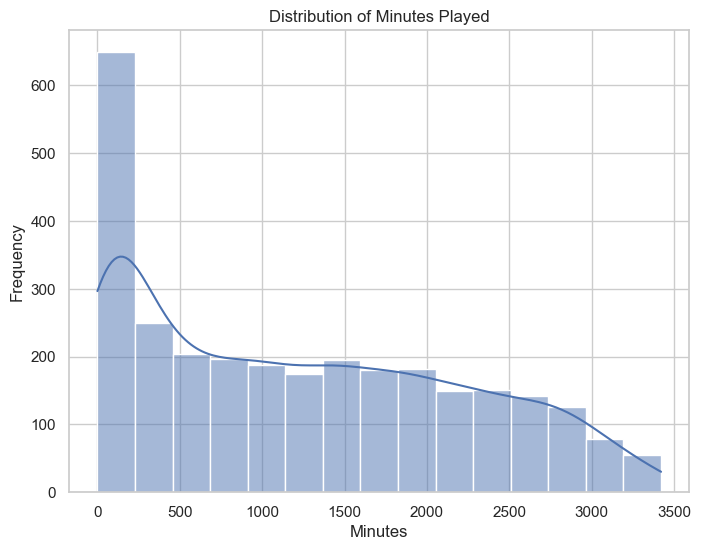

In [19]:
# Distribution of Minutes Played
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.histplot(Player_Stats['Min'], kde=True)
plt.title('Distribution of Minutes Played')
plt.xlabel('Minutes')
plt.ylabel('Frequency')
plt.show()

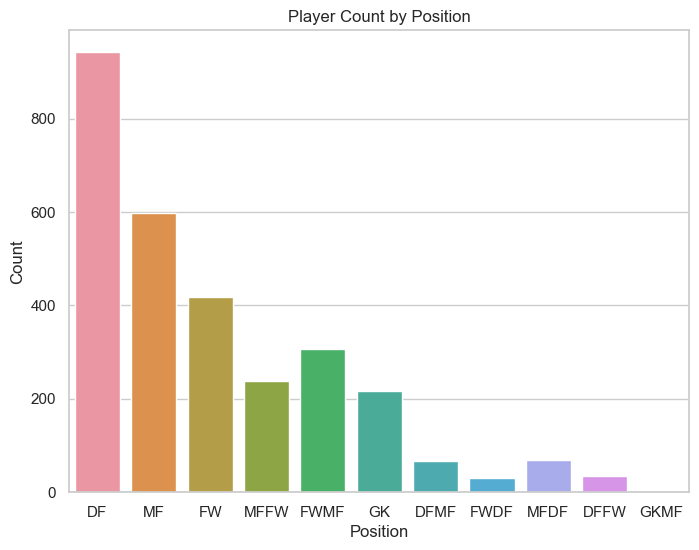

In [71]:
# Player Count by Position
plt.figure(figsize=(8, 6))
sns.countplot(data=Player_Stats, x='Pos')
plt.title('Player Count by Position')
plt.xlabel('Position')
plt.ylabel('Count')
plt.show()

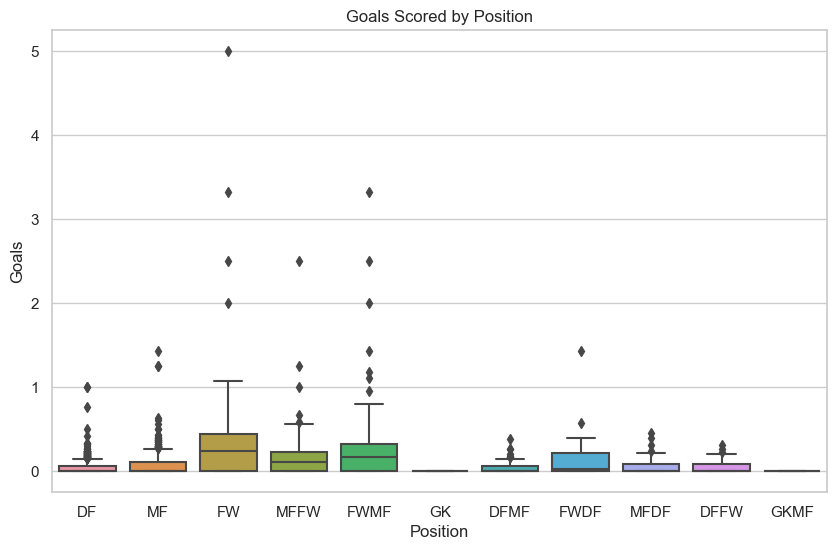

In [75]:
# Boxplot of Goals per Position
plt.figure(figsize=(10, 6))
sns.boxplot(data=Player_Stats, x='Pos', y='Goals')
plt.title('Goals Scored by Position')
plt.xlabel('Position')
plt.ylabel('Goals')
plt.show()

In [39]:
# Filter numeric columns for features
numeric_features = Player_Stats.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Ensure target is included
if 'Pos' not in Player_Stats.columns:
    print("Check column names, 'Pos' not found.")
else:
    print(f"Target column 'Pos' found. You have {len(numeric_features)} numeric features.")

Target column 'Pos' found. You have 138 numeric features.


In [43]:
# Drop rows with missing target
Player_Stats = Player_Stats.dropna(subset=['Pos'])

X = Player_Stats[numeric_features]
y = Player_Stats['Pos']

# Fill or drop remaining NaNs if any
X = X.fillna(0)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
# Initialize and train
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [47]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.6837606837606838
              precision    recall  f1-score   support

          DF       0.87      0.89      0.88       190
        DFFW       0.12      0.14      0.13         7
        DFMF       0.08      0.08      0.08        13
          FW       0.70      0.59      0.64        81
        FWDF       0.00      0.00      0.00         3
        FWMF       0.52      0.46      0.49        57
          GK       1.00      1.00      1.00        34
          MF       0.70      0.71      0.70       134
        MFDF       0.35      0.38      0.36        16
        MFFW       0.34      0.40      0.37        50

    accuracy                           0.68       585
   macro avg       0.47      0.46      0.47       585
weighted avg       0.69      0.68      0.69       585



In [65]:
y_proba = model.predict_proba(X_test)
print("Example probabilities for first 5 samples:")
print(pd.DataFrame(y_proba[:5], columns=model.classes_))

Example probabilities for first 5 samples:
    DF  DFFW  DFMF   FW  FWDF  FWMF   GK  GKMF   MF  MFDF  MFFW
0  0.0   0.0   0.0  0.0   0.0   0.0  1.0   0.0  0.0   0.0   0.0
1  0.0   0.0   0.0  0.0   0.0   0.0  0.0   0.0  0.0   0.0   1.0
2  0.0   0.0   0.0  1.0   0.0   0.0  0.0   0.0  0.0   0.0   0.0
3  0.0   0.0   0.0  0.0   0.0   0.0  0.0   0.0  1.0   0.0   0.0
4  1.0   0.0   0.0  0.0   0.0   0.0  0.0   0.0  0.0   0.0   0.0


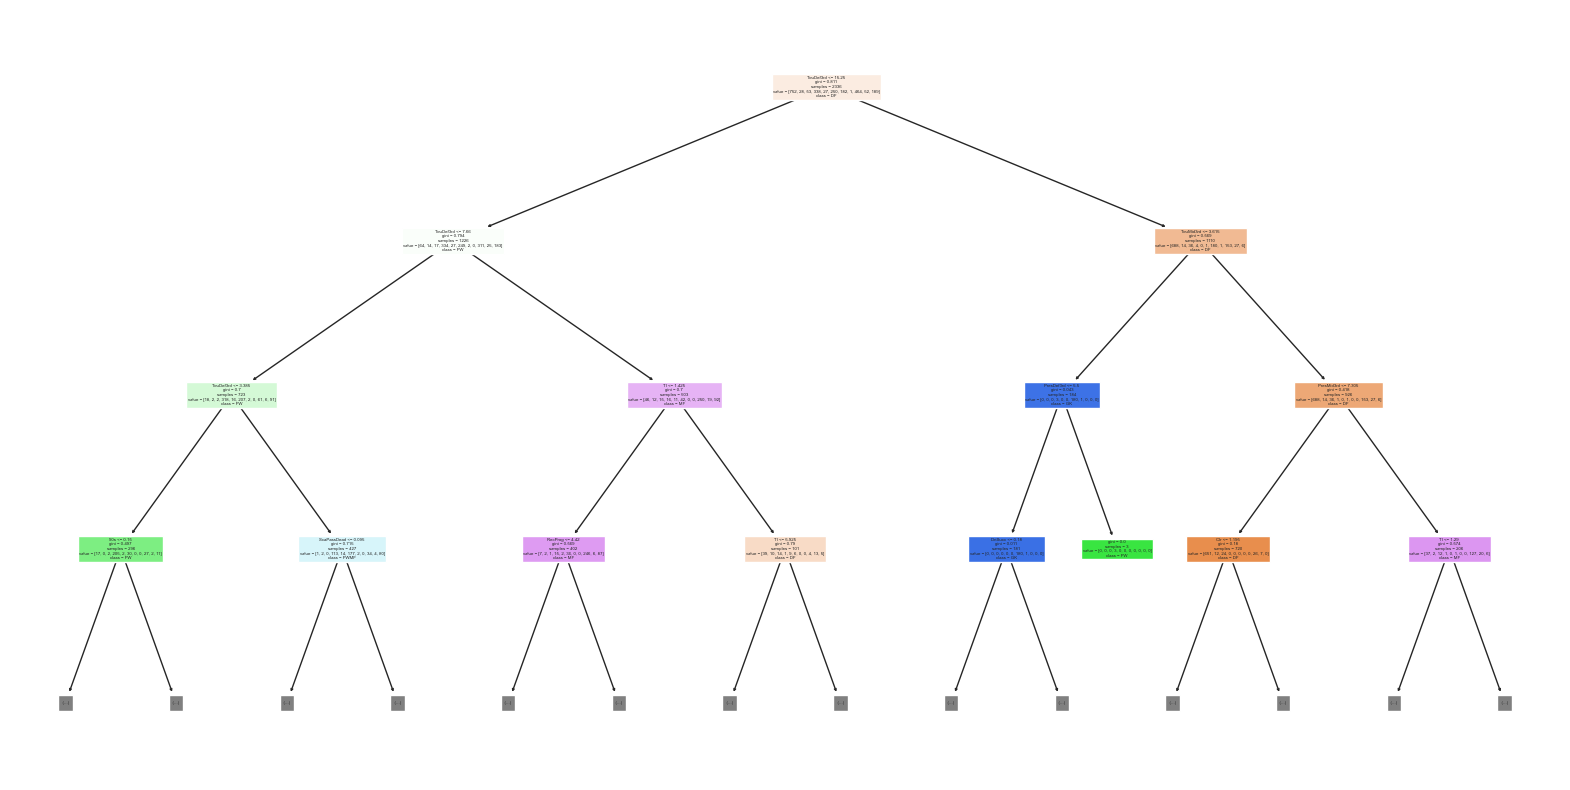

In [67]:
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=numeric_features, class_names=model.classes_, filled=True, max_depth=3)
plt.show()

In [69]:
print(f"The model achieved an accuracy of {accuracy_score(y_test, y_pred):.2f},")
print("suggesting it performs X% better than random guessing.")
print("The classification report below shows how well the model performs for each position class:")
print(classification_report(y_test, y_pred))

The model achieved an accuracy of 0.68,
suggesting it performs X% better than random guessing.
The classification report below shows how well the model performs for each position class:
              precision    recall  f1-score   support

          DF       0.87      0.89      0.88       190
        DFFW       0.12      0.14      0.13         7
        DFMF       0.08      0.08      0.08        13
          FW       0.70      0.59      0.64        81
        FWDF       0.00      0.00      0.00         3
        FWMF       0.52      0.46      0.49        57
          GK       1.00      1.00      1.00        34
          MF       0.70      0.71      0.70       134
        MFDF       0.35      0.38      0.36        16
        MFFW       0.34      0.40      0.37        50

    accuracy                           0.68       585
   macro avg       0.47      0.46      0.47       585
weighted avg       0.69      0.68      0.69       585



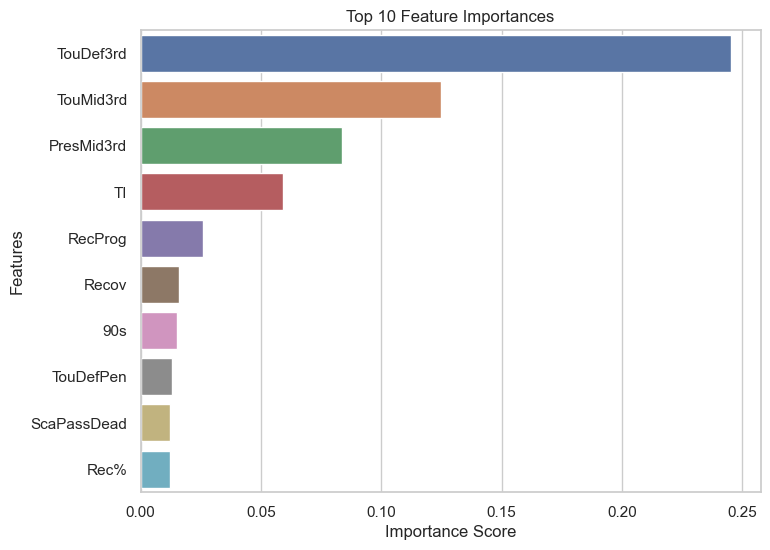

In [77]:
importances = pd.Series(model.feature_importances_, index=numeric_features)
top_features = importances.sort_values(ascending=False).head(10)

plt.figure(figsize=(8, 6))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()